# 3. Clustering
## After our analysis of the data we must now cluster the data accordingly
Importing approriate libraries

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### First, we read in our data

In [42]:
index95 = pd.read_csv('data/index_95.csv')
index100 = pd.read_csv('data/index_100.csv')
index150 = pd.read_csv('data/index_150.csv')
win95 = pd.read_csv('data/wi_95.csv')
win100 = pd.read_csv('data/wi_100.csv')
win150 = pd.read_csv('data/wi_150.csv')
loss95 = pd.read_csv('data/lo_95.csv')
loss100 = pd.read_csv('data/lo_100.csv')
loss150 = pd.read_csv('data/lo_150.csv')
choice95 = pd.read_csv('data/choice_95.csv')
choice100 = pd.read_csv('data/choice_100.csv')
choice150 = pd.read_csv('data/choice_150.csv')

Cleaned data from processing

In [43]:
cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')

In [44]:
cleaned95.head()

,Margin,Most Common Choice,Study,Average Choice
Subj_1,1150,4,Fridberg,3.400000
Subj_2,-675,4,Fridberg,2.568421
Subj_3,-750,4,Fridberg,2.778947
Subj_4,-525,4,Fridberg,2.810526
Subj_5,100,4,Fridberg,3.021053


Initially, I decided to cluster based on the profit/loss margin for each subject and their most common choice. However, the most common choice would limit the clusters greatly I felt. There would only be 4 possible values (1,2,3 or 4) and this would limit what we could learn from the approriate cluster analysis. This lead me to going back to my data processing and creating the average choice column to add to my data. This was the sum of all the subjects selection divided by the number of trials and I felt this would provide better cluster analysis as a result as there would be far more variety in the range of values.

In [55]:
kmeans_margin_choice = KMeans(n_clusters=3).fit(cleaned95[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice.cluster_centers_

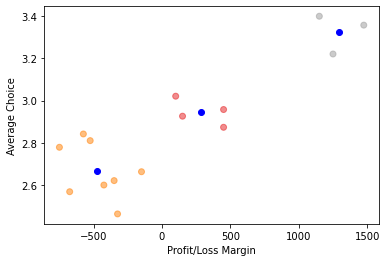

In [56]:
plt.scatter(cleaned95['Margin'], cleaned95['Average Choice'], c= kmeans_margin_choice.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue')
plt.xlabel('Profit/Loss Margin')
plt.ylabel('Average Choice')
plt.show()

From our cluster analysis here of the 95 trial experiments, it is interesting to note in the Fridberg study the cluster which had the highest average choice also made the most money by a significant distance. K = 3 is certainly the optimal number of clusters here as they are very much pre-defined and easy to distinguish by looking at the scatter plot.

In [59]:
kmeans_margin_choice100 = KMeans(n_clusters=3).fit(cleaned100[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice100.cluster_centers_

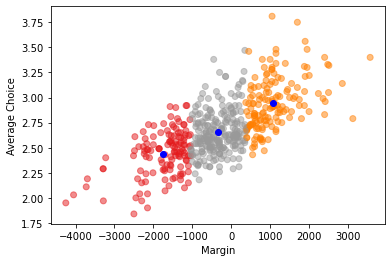

In [61]:
plt.scatter(cleaned100['Margin'], cleaned100['Average Choice'], c= kmeans_margin_choice100.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue')
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.show()

In [64]:
kmeans_margin_choice150 = KMeans(n_clusters=3).fit(cleaned150[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice150.cluster_centers_

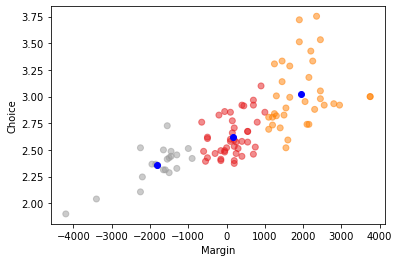

In [66]:
plt.scatter(cleaned150['Margin'], cleaned150['Average Choice'], c= kmeans_margin_choice150.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue')
plt.xlabel('Margin')
plt.ylabel('Choice')
plt.show()